In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import numpy.fft
import clock_noise
#reload(clock_noise)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 16

fSr = 429228004229873.1

## Sensitivity function

In [2]:
ramseyTweezer1 = clock_noise.atoms(clock_noise.ramseyTweezer(tdark= 0.100, tdead=0.09, tprep=0.300,tpi=0.03,n=1),
                       laser=clock_noise.siPlusComb2(hthermal=1.5e-33))
ramseyTweezer5 = clock_noise.atoms(clock_noise.ramseyTweezer(tdark= 0.100, tdead=0.09, tprep=0.300,tpi=0.03,n=5),
                       laser=clock_noise.siPlusComb2(hthermal=1.5e-33))

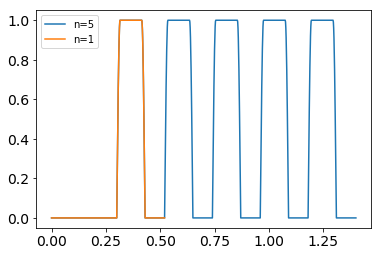

In [3]:
#Time domain

times5 = np.linspace(0,0.3+0.22*5,1000)
times1 = np.linspace(0,0.3+0.22,1000)
sens1 = ramseyTweezer1.pulse_sequence.sensitivity_function(times1)
sens5 = ramseyTweezer5.pulse_sequence.sensitivity_function(times5)

plt.figure()
plt.plot(times5,sens5,label='n=5')
plt.plot(times1,sens1,label='n=1')
plt.legend()
plt.show()

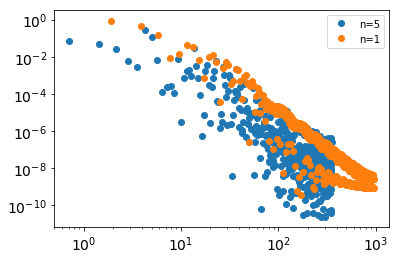

In [4]:
#Frequency domain

f1,psd1 = ramseyTweezer1.pulse_sequence.sensitivity_psd()
f5,psd5 = ramseyTweezer5.pulse_sequence.sensitivity_psd()

plt.figure()
plt.loglog(f5,psd5,'o',label='n=5')
plt.loglog(f1,psd1,'o',label='n=1')
plt.legend()
plt.show()

## Limiting cases

In [5]:
# n=1 should look like normal ramsey spectroscopy with tdead=390 ms

ramseyTweezer = clock_noise.atoms(clock_noise.ramseyTweezer(tdark= 0.100, tdead=0.09, tprep=0.300,tpi=0.03,n=1),
                       laser=clock_noise.siPlusComb2(hthermal=1.5e-33))
print(ramseyTweezer.allan_dick_effect())

ramsey = clock_noise.atoms(clock_noise.ramsey(tdark= 0.100, tdead=0.39,tpi=0.03),
                       laser=clock_noise.siPlusComb2(hthermal=1.5e-33))
print(ramsey.allan_dick_effect())

8.40612908166e-17
8.40632794283e-17


In [6]:
# n>>1 should look like ramsey with tdead=90 ms
ramseyTweezer = clock_noise.atoms(clock_noise.ramseyTweezer(tdark= 0.100, tdead=0.09, tprep=0.300,tpi=0.03,n=100),
                       laser=clock_noise.siPlusComb2(hthermal=1.5e-33))
print(ramseyTweezer.allan_dick_effect())

ramsey = clock_noise.atoms(clock_noise.ramsey(tdark= 0.100, tdead=0.09,tpi=0.03),
                       laser=clock_noise.siPlusComb2(hthermal=1.5e-33))
print(ramsey.allan_dick_effect())

4.66094767471e-17
4.58845594086e-17


## Calculation for Fig S3

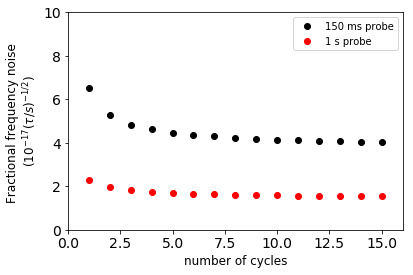

In [71]:
#Calc for 100 ms dark time
dick = []
indicies = range(1,16)
for ii in indicies:
    ramseyTweezer = clock_noise.atoms(clock_noise.ramseyTweezer(tdark= 0.120, tdead=0.09, tprep=0.300,tpi=0.03,n=ii),
                       laser=clock_noise.siPlusComb2())
    dick.append(ramseyTweezer.allan_dick_effect())
    dick_port.append(ramseyTweezer_port.allan_dick_effect())

#Calc for 1 s dark time
dick2 = []
for ii in indicies:
    ramseyTweezer = clock_noise.atoms(clock_noise.ramseyTweezer(tdark= 1.00, tdead=0.09, tprep=0.300,tpi=0.03,n=ii),
                       laser=clock_noise.siPlusComb2(hthermal=1.5e-33))
    dick2.append(ramseyTweezer.allan_dick_effect())

    
plt.figure()
plt.plot(indicies,np.array(dick)*10**17,'ko',label='150 ms probe')
plt.plot(indicies,np.array(dick2)*10**17,'ro',label='1 s probe')

plt.xlim(0,16)
plt.ylim(0,10)
plt.legend()
#plt.grid(True,which='both')
plt.xlabel('number of cycles', fontsize = 12)
plt.ylabel('Fractional frequency noise \n' + r'$(10^{-17}(\tau/s)^{-1/2})$', fontsize = 12)

plt.savefig('DickEffect.pdf',dpi=200)
plt.show()


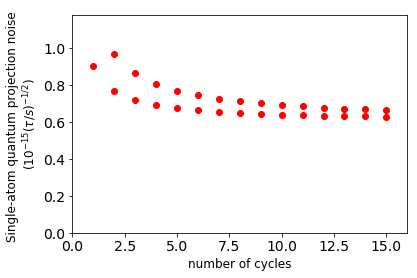

In [72]:
def get_qpn(t_dead_cycle, t_probe, dead, Nat, m):
    f0 = 429*10**12
    T_tot = m*(t_dead_cycle + t_probe)+dead
    tot_duty = m*t_probe/T_tot
    stab = 1/(2*np.pi*f0*np.sqrt(Nat*tot_duty*t_probe))
    return stab

loss_rate = .00
t_dead_cycle = .105
t_probe = .135
dead = 0.3
Nat = 5

ms = np.arange(1,16) #number of pulses per step
stabs_qpn = []
for m in ms:
    stabs_qpn.append(get_qpn(t_dead_cycle, t_probe, dead, Nat, m))
    
stabs_qpn_ll = []
dead = 0.75
for m in ms:
    stabs_qpn_ll.append(get_qpn(t_dead_cycle, t_probe, dead, Nat, m))

plt.plot(ms, np.array(stabs_qpn)*10**15, 'ro')
plt.plot(ms, np.array(stabs_qpn_ll)*10**15, 'ro')

plt.xlabel('number of cycles', fontsize = 12)
plt.ylabel('Single-atom quantum projection noise \n'+r'$(10^{-15}(\tau/s)^{-1/2})$', fontsize = 12)

plt.axis([0, max(ms)+1, 0, max(stabs_qpn)*1.3*10**15]);
#plt.savefig('qpn_multi.pdf', format = 'pdf')

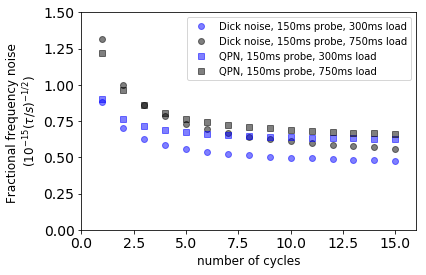

In [74]:
#Calc for 100 ms dark time
dick_port = []
dick_port_ll = []

indicies = range(1,16)
for ii in indicies:
    ramseyTweezer_port = clock_noise.atoms(clock_noise.ramseyTweezer(tdark= 0.120, tdead=0.09, tprep=0.300,tpi=0.03,n=ii),
                       laser=clock_noise.portable(hthermal=1.6e-31))
    dick_port.append(ramseyTweezer_port.allan_dick_effect())
    ramseyTweezer_port_ll = clock_noise.atoms(clock_noise.ramseyTweezer(tdark= 0.120, tdead=0.09, tprep=0.750,tpi=0.03,n=ii),
                       laser=clock_noise.portable(hthermal=1.6e-31))
    dick_port_ll.append(ramseyTweezer_port_ll.allan_dick_effect())

    
plt.figure()
plt.plot(indicies,np.array(dick_port)*10**15,'bo',label='Dick noise, 150ms probe, 300ms load', alpha = 0.5)
plt.plot(indicies,np.array(dick_port_ll)*10**15,'ko',label='Dick noise, 150ms probe, 750ms load', alpha = 0.5)
plt.plot(indicies, np.array(stabs_qpn)*10**15, 'bs', label = 'QPN, 150ms probe, 300ms load', alpha = 0.5)
plt.plot(indicies, np.array(stabs_qpn_ll)*10**15, 'ks', label = 'QPN, 150ms probe, 750ms load', alpha = 0.5)

plt.xlim(0,16)
plt.ylim(0,1.5)
plt.legend()

plt.xlabel('number of cycles', fontsize = 12)
plt.ylabel('Fractional frequency noise \n' + r'$(10^{-15}(\tau/s)^{-1/2})$', fontsize = 12)

#plt.grid(True,which='both')
#plt.savefig('DickEffect_portable.pdf',dpi=200)
plt.show()
